# Investigating Correlation between Blockchain ETF and Cryptocurrency Prices
We are investigating the Elwood Blockchain Global Equity Index. All prices are in USD unless otherwise indicated.

## Imports

In [25]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime

## Load Data

### Load Historic ETF Prices
The data was downloaded from Yahoo Finance on May 2nd with daily prices as traded on the Milan Stock Exchange.

In [48]:
# Store date against closing price
etf_dates = []
etf_prices = []

with open("data/BCHN-MI.csv", newline="") as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        try:
            date = datetime.strptime(row[0], '%Y-%m-%d')
            price = float(row[4])
            etf_dates.append(date)
            etf_prices.append(price)
        except ValueError:
            pass
        
print(f"Number of ETF closing prices: {len(etf_dates)}.")

Number of ETF closing prices: 530.


### Load Historic Bitcoin Prices
The data was downloaded from Yahoo Finance on May 2nd with daily prices from CCC - CoinMarketCap.

In [35]:
#Store date against closing price
btc_dates = []
btc_prices = []

with open("data/BTC-USD.csv", newline="") as file:
    reader = csv.reader(file, delimiter=',', quotechar='|')
    for row in reader:
        try:
            date = datetime.strptime(row[0], '%Y-%m-%d')
            price = float(row[4])
            btc_dates.append(date)
            btc_prices.append(price)
        except ValueError:
            pass
        
print(f"Number of BTC closing prices: {len(btc_dates)}.")

Number of BTC closing prices: 2416.


## Analysis

### Plot Raw Prices

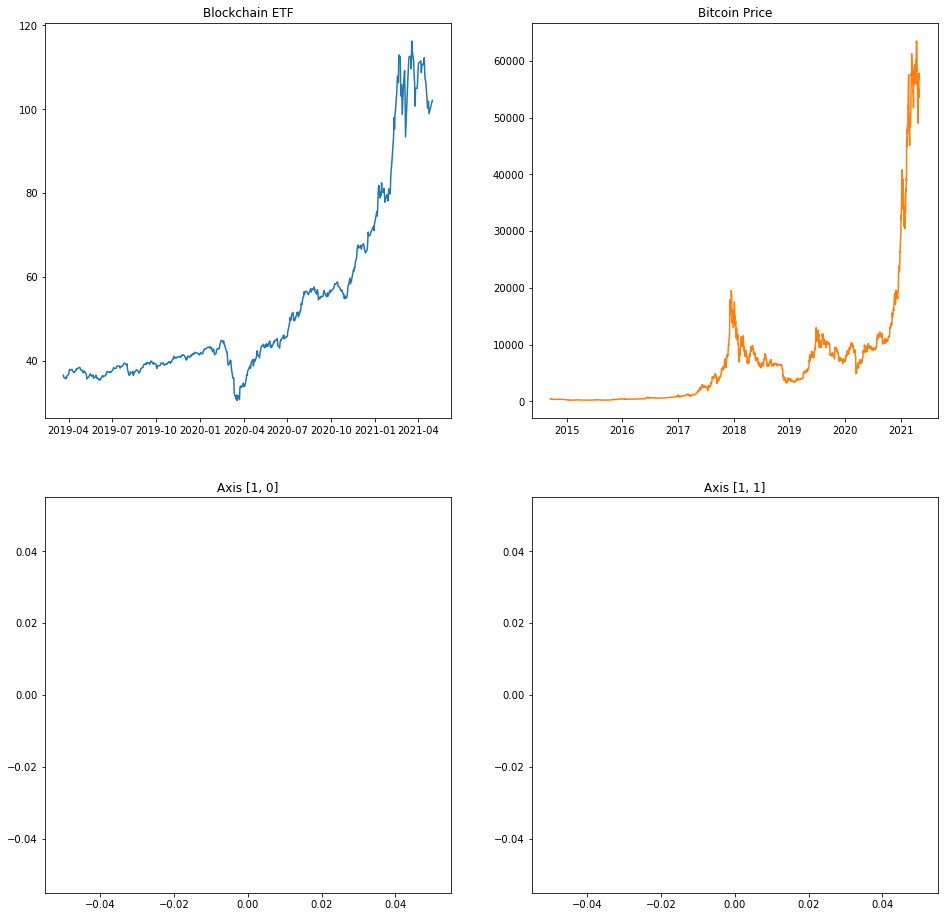

In [56]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16, 16)

axs[0, 0].set_title('Blockchain ETF')
axs[0, 0].plot(etf_dates, etf_prices)

axs[0, 1].set_title('Bitcoin Price')
axs[0, 1].plot(btc_dates, btc_prices, 'tab:orange')

axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].plot([], [], 'tab:green')

axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].plot([], [], 'tab:red')

plt.show()

### Plot Price Overlay

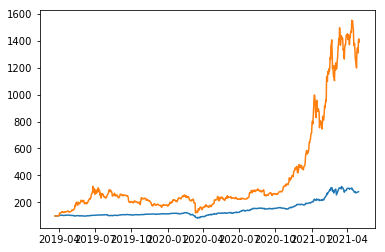

In [75]:
# Index ETF Price at 100
etf_price_change = []
index = 100
for i in range(1, len(etf_prices)):
    index = index * etf_prices[i] / etf_prices[i-1]
    etf_price_change.append(index)
    
# Index BTC Price at 100
btc_price_change = []
index = 100
start_match = 0
for i in range(len(btc_prices)):
    if btc_dates[i] == etf_dates[0]:
        start_match = i
for i in range(start_match, len(btc_prices)):
    index = index * btc_prices[i] / btc_prices[i-1]
    btc_price_change.append(index)
    
plt.plot(etf_dates[1:], etf_price_change)
plt.plot(btc_dates[start_match:], btc_price_change, 'tab:orange')
plt.show()